
COVID-19 Coronavirus worldwide cases:EDA and Forecasting 


COVID-19 Coronavirus worldwide cases: EDA and Forecasting  Background COVID-19 (previously known as 2019 Novel Coronavirus, or 2019-nCoV), is a new respiratory virus first identified in Wuhan, Hubei Province, China. 

Public health officials and partners are working hard to identify the source of the COVID-19. Coronaviruses are a large family of viruses, some causing illness in people and others that circulate among animals, including camels, cats and bats. Analysis of the genetic tree of this virus is ongoing to know the specific source of the virus.

This virus probably originally emerged from an animal source but now seems to be spreading from person-to-person. It’s important to note that person-to-person spread can happen on a continuum. Some viruses are highly contagious (like measles), while other viruses are less so. At this time, it’s unclear how easily or sustainably this virus is spreading between people. Learn what is known about the spread of newly emerged coronaviruses.

DATA IMPORT,PRE_PROCESSING AND EDA

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
from fbprophet import Prophet
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from collections import namedtuple

In [18]:
df = pd.read_csv('C:/Users/tejas/Desktop/Covid-19/covid_19_data.csv',parse_dates=['Last Update'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

In [19]:
df.head()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,1/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1,0,0
1,2,1/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14,0,0
2,3,1/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6,0,0
3,4,1/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1,0,0
4,5,1/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0,0,0


In [20]:
df_confirmed = pd.read_csv("C:\\Users\\tejas\\Desktop\\Covid-19\\time_series_covid_19_confirmed.csv")
df_recovered = pd.read_csv("C:/Users/tejas/Desktop/Covid-19/time_series_covid_19_recovered.csv")
df_deaths = pd.read_csv("C:/Users/tejas/Desktop/Covid-19/time_series_covid_19_deaths.csv")

df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

In [21]:
df_confirmed.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,916,933,946,948,949,964,969,981,989,998
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,761,761,761,761,761,762,762,762,762,762
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,48,48,48,50,52,52,58,60,61,69


Earliest cases

In [22]:
df.head()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,1/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1,0,0
1,2,1/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14,0,0
2,3,1/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6,0,0
3,4,1/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1,0,0
4,5,1/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0,0,0


Latest cases

In [23]:
df.tail()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
28969,28970,5/24/2020,Yucatan,Mexico,2020-05-25 02:32:00,1487,116,963
28970,28971,5/24/2020,Yukon,Canada,2020-05-25 02:32:00,11,0,11
28971,28972,5/24/2020,Yunnan,Mainland China,2020-05-25 02:32:00,185,2,183
28972,28973,5/24/2020,Zacatecas,Mexico,2020-05-25 02:32:00,236,27,159
28973,28974,5/24/2020,Zhejiang,Mainland China,2020-05-25 02:32:00,1268,1,1267


BY COUNTRY DATE AND STATE(SORTED) to get feel of data

In [24]:
df2 = df.groupby(["Date", "Country", "Province/State"])[['Date', 'Province/State', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

In [25]:
df2

,Date,Country,Province/State,Confirmed,Deaths,Recovered
0,1/22/2020,Hong Kong,Hong Kong,0,0,0
1,1/22/2020,Macau,Macau,1,0,0
2,1/22/2020,Mainland China,Anhui,1,0,0
3,1/22/2020,Mainland China,Beijing,14,0,0
4,1/22/2020,Mainland China,Chongqing,6,0,0
...,...,...,...,...,...,...
14244,5/9/2020,US,Virginia,23196,827,0
14245,5/9/2020,US,Washington,16674,921,0
14246,5/9/2020,US,West Virginia,1323,52,0
14247,5/9/2020,US,Wisconsin,9939,398,0


BY COUNTRY (SORTED)

In [26]:
df.groupby("Country")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

,Country,Confirmed,Deaths,Recovered
0,Azerbaijan,1,0,0
1,"('St. Martin',)",2,0,0
2,Afghanistan,162232,4230,18620
3,Albania,39220,1564,24090
4,Algeria,222870,22006,97680
...,...,...,...,...
218,Western Sahara,289,0,174
219,Yemen,2214,367,72
220,Zambia,13445,201,4609
221,Zimbabwe,1648,191,323


In [ ]:
DATA VISULIZATION

In [27]:
del df['SNo']

In [28]:
df.groupby('Date').sum()

,Confirmed,Deaths,Recovered
Date,,,
1/22/2020,555,17,28
1/23/2020,653,18,30
1/24/2020,941,26,36
1/25/2020,1438,42,39
1/26/2020,2118,56,52
...,...,...,...
5/5/2020,3662691,257239,1198832
5/6/2020,3755341,263831,1245413
5/7/2020,3845718,269567,1284741


Summary Plot of Worldwide Cases - Confirmed, Deaths & Recovered

In [47]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [38]:
confirmed.head(50)

,Confirmed,Deaths,Recovered
Date,,,
1/22/2020,555,17,28
1/23/2020,653,18,30
1/24/2020,941,26,36
1/25/2020,1438,42,39
1/26/2020,2118,56,52
1/27/2020,2927,82,61
1/28/2020,5578,131,107
1/29/2020,6165,133,126
1/30/2020,8235,171,143


In [32]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'], 
                         y=confirmed['Confirmed'],
                         mode='lines+markers',
                         name='Confirmed',
                         line=dict(color='blue', width=1)
                        ))
fig.add_trace(go.Scatter(x=deaths['Date'], 
                         y=deaths['Deaths'],
                         mode='lines+markers',
                         name='Deaths',
                         line=dict(color='Red', width=1)
                        ))
fig.add_trace(go.Scatter(x=recovered['Date'], 
                         y=recovered['Recovered'],
                         mode='lines+markers',
                         name='Recovered',
                         line=dict(color='Green', width=1)
                        ))
fig.update_layout(
    title='Worldwide Corona Virus Cases - Confirmed, Deaths, Recovered (Line Chart)',
    xaxis_tickfont_size=10,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=12,
        tickfont_size=10,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    )
)
fig.show()

In [30]:
fig = go.Figure()
fig.add_trace(go.Bar(x=confirmed['Date'],
                y=confirmed['Confirmed'],
                name='Confirmed',
                marker_color='blue'
                ))
fig.add_trace(go.Bar(x=deaths['Date'],
                y=deaths['Deaths'],
                name='Deaths',
                marker_color='Red'
                ))
fig.add_trace(go.Bar(x=recovered['Date'],
                y=recovered['Recovered'],
                name='Recovered',
                marker_color='Green'
                ))

fig.update_layout(
    title='Worldwide Corona Virus Cases - Confirmed, Deaths, Recovered (Bar Chart)',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)', # gap between bars of adjacent location coordinates.
        bordercolor='rgba(255, 255, 255, 0)'# gap between bars of the same location coordinate.
    ),
    barmode='group',
    bargap=0.15, 
    bargroupgap=0.1 
)
fig.show()

Tranforming data for Time Series

In [68]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [60]:
confirmed

,Date,Confirmed
0,1/22/2020,555
1,1/23/2020,653
2,1/24/2020,941
3,1/25/2020,1438
4,1/26/2020,2118
...,...,...
119,5/5/2020,3662691
120,5/6/2020,3755341
121,5/7/2020,3845718
122,5/8/2020,3938064


In [36]:
confirmed.columns = ['ds','y'] # renaming colunms as ds and y
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])#converting string data time into panda datatime

In [37]:
confirmed.head()

,ds,y
0,2020-01-22,555
1,2020-01-23,653
2,2020-01-24,941
3,2020-01-25,1438
4,2020-01-26,2118


Forecasting Confirmed Cases Worldwide with Prophet (Baseline)

We perform a week's ahead forecast with Prophet, with 95% prediction intervals. Here, no tweaking of seasonality-related parameters and additional regressors are performed.

In [38]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
126,2020-05-27
127,2020-05-28
128,2020-05-29
129,2020-05-30
130,2020-05-31


In [39]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
126,2020-05-27,5.603047e+06,5.568960e+06,5.633878e+06
127,2020-05-28,5.692728e+06,5.652955e+06,5.727181e+06
128,2020-05-29,5.785784e+06,5.739771e+06,5.825327e+06
129,2020-05-30,5.875511e+06,5.811884e+06,5.923078e+06
130,2020-05-31,5.960887e+06,5.888797e+06,6.026452e+06


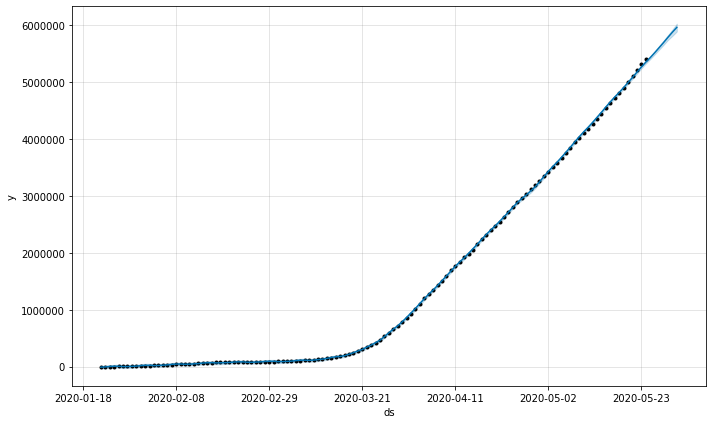

In [40]:
confirmed_forecast_plot = m.plot(forecast)

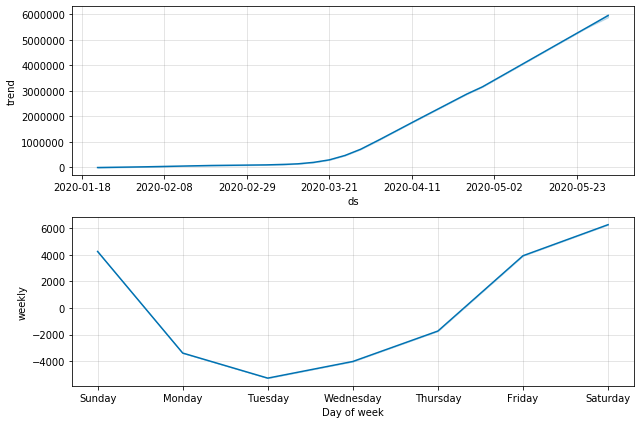

In [41]:
forecast_components = m.plot_components(forecast)

In [ ]:
Forecasting recoveres Cases Worldwide with Prophet (Baseline)

In [61]:
recovered.columns = ['ds','y'] # renaming colunms as ds and y
recovered['ds'] = pd.to_datetime(recovered['ds']) #converting string data time into panda date time

In [62]:
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
126,2020-05-27
127,2020-05-28
128,2020-05-29
129,2020-05-30
130,2020-05-31


In [63]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
126,2020-05-27,2.218417e+06,2.183014e+06,2.250978e+06
127,2020-05-28,2.263702e+06,2.228625e+06,2.296282e+06
128,2020-05-29,2.312955e+06,2.275785e+06,2.348065e+06
129,2020-05-30,2.359451e+06,2.320178e+06,2.397999e+06
130,2020-05-31,2.404434e+06,2.363828e+06,2.444911e+06


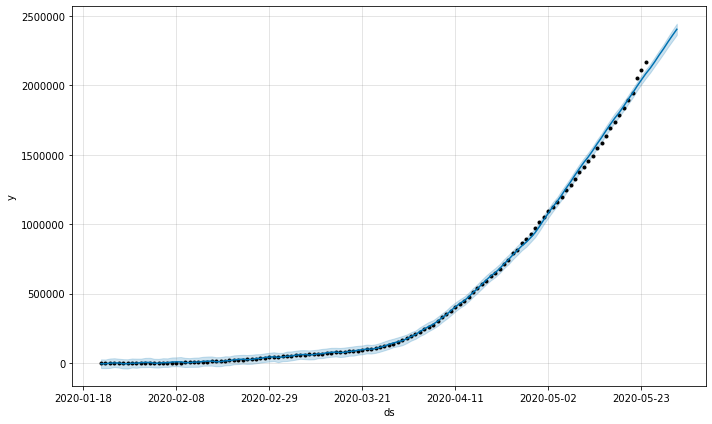

In [64]:
recovered_forecast_plot = m.plot(forecast)

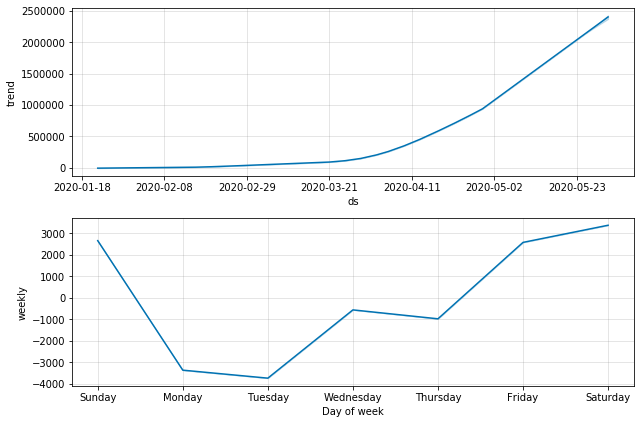

In [65]:
forecast_components = m.plot_components(forecast)

Forecasting Death Cases Worldwide with Prophet (Baseline)

In [70]:
deaths.columns = ['ds','y'] 
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [72]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
126,2020-05-27
127,2020-05-28
128,2020-05-29
129,2020-05-30
130,2020-05-31


In [73]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
126,2020-05-27,362756.169560,360275.443856,365462.558845
127,2020-05-28,367994.815942,364513.909428,371282.618371
128,2020-05-29,373110.216260,368850.744634,376851.062123
129,2020-05-30,377707.714925,372224.360418,382784.154968
130,2020-05-31,381819.317225,375261.673679,388143.566306


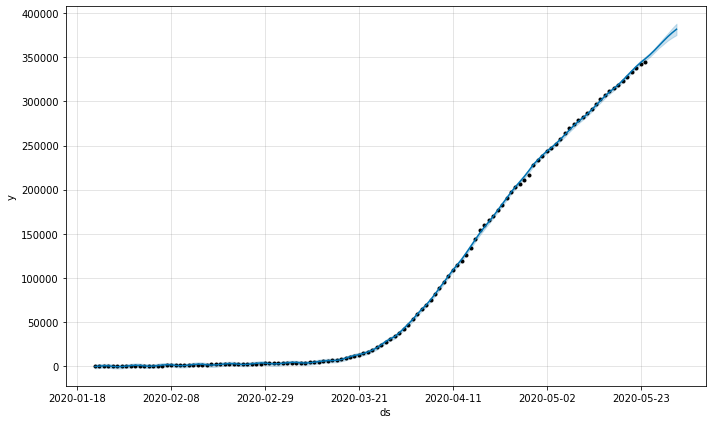

In [75]:
deaths_forecast_plot=m.plot(forecast)

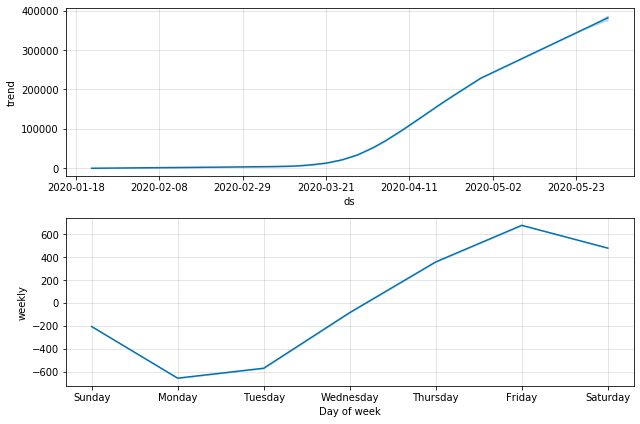

In [77]:
forecast_components=m.plot_components(forecast)

CONCLUSION:
From forecast it is clear that we are seeing upward trend in cases of confirmed,death and recovered. In the weekly trends plot cases are highest at the weekends.